In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('Sub2Sys_based.csv')
dataset.head()

,Function,Failure Condition_1,Parent_System_1,Failure_Condition_2,Parent System_2,DAL
0,A,0,0,0,0,0
1,A,1,0,0,0,1
2,B,0,0,0,0,0
3,B,1,0,0,0,1
4,C,0,0,0,0,0


In [6]:
dataset.isnull().any()

Function               False
Failure Condition_1    False
Parent_System_1        False
Failure_Condition_2    False
Parent System_2        False
DAL                    False
dtype: bool

In [7]:
df1 = pd.get_dummies(dataset['Function'],dtype='float')

In [8]:
df1.head()

,A,B,C,D
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [9]:
df2 = pd.concat([df1.drop(columns='A',axis=1),dataset.drop(columns='Function',axis=1)],axis=1)

In [10]:
# trying a different approach
# df3 = pd.concat([df1,dataset.drop(columns='Function',axis=1)],axis=1)
# X1 = df3.drop(columns='DAL', axis=1)
# y1 = df3.DAL
# X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
# X1_train.shape,y1_train.shape,X1_test.shape,y1_test.shape
# clf = LogisticRegression()
# clf.fit(X1_train,y1_train)
# results = clf.predict(X1_test)
# acc1 = accuracy_score(results,y1_test)
# print('accuracy_score of LogisticRegression is= ',acc1)
# clf1 = SVC(kernel='linear')
# clf1.fit(X1_train,y1_train)
# results = clf1.predict(X1_test)
# acc2 = accuracy_score(results,y1_test)
# print('accuracy_score of SVM is= ',acc2)
# cr_matrix = df3.corr()
# sns.heatmap(cr_matrix,annot=True,cmap='coolwarm', linewidths=.3 )





In [11]:
df2.head()

,B,C,D,Failure Condition_1,Parent_System_1,Failure_Condition_2,Parent System_2,DAL
0,0.0,0.0,0.0,0,0,0,0,0
1,0.0,0.0,0.0,1,0,0,0,1
2,1.0,0.0,0.0,0,0,0,0,0
3,1.0,0.0,0.0,1,0,0,0,1
4,0.0,1.0,0.0,0,0,0,0,0


In [12]:
X = df2.drop(columns='DAL', axis=1)
y = df2.DAL

In [13]:
X.shape,y.shape

((64, 7), (64,))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((51, 7), (51,), (13, 7), (13,))

In [15]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
results = clf.predict(X_test)
acc = accuracy_score(results,y_test)
acc


0.6153846153846154

In [16]:
clf1 = SVC(kernel='linear')
clf1.fit(X_train,y_train)
results = clf1.predict(X_test)
acc = accuracy_score(results,y_test)
acc


0.9230769230769231

In [17]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<Axes: >

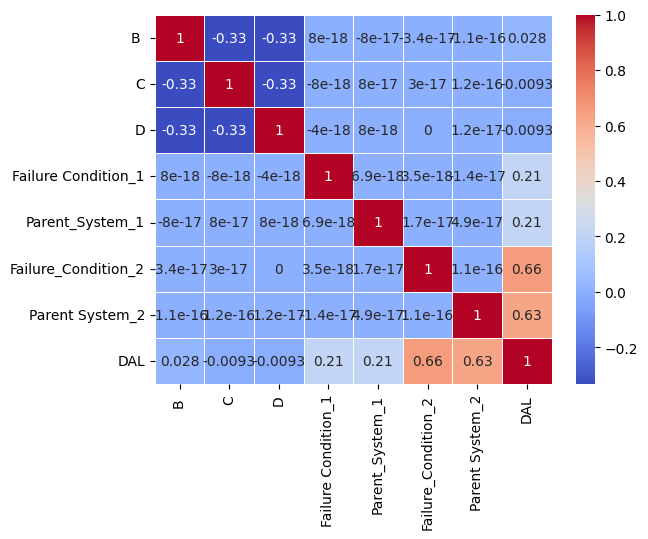

In [18]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', linewidths=.5)
